**This is my first public Kaggle notebook!** I am happy to share my experience with you, Kagglers!

**My roadmap:**

* Importing dataset,
* Visualization dataset,
* Filling missing values,
* Implementing LogisticRegression, 
* Use LogisticRegression to predict test dataset,
* Upload my results to public leaderboard.



In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


*df.head()* & *df.tail()* made similar work!

First of all, I must change **Sex** from **Categorical format** to **Numerical format** in both *df* & *test*:

In [6]:
sex_bin = {"female": 0,   # Zero is female 
           "male": 1}     # One is for male
df['Sex'] = df['Sex'].map(sex_bin)
test['Sex'] = test['Sex'].map(sex_bin)

<Axes: xlabel='Sex', ylabel='count'>

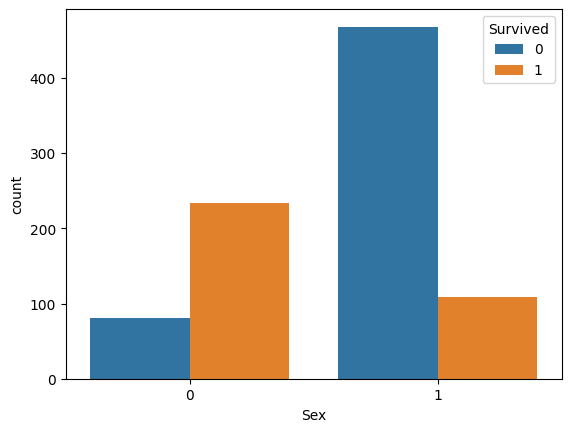

In [7]:
sns.countplot(x="Sex", hue="Survived", data=df)

So to conclude from above plot:
* majority of male are NOT survived
* majority of female are survived
* male are greater than female

Let\`s observe **heatmap**
* Low correlations are between Survived and [Fare & Pclass]
* Zero correlations are between Survived and [Age, SibSp, PassengerId and Parch]
* Age & Pclass has normal negative correlation which means that Pclass maybe been devived into Age category
* Fare & Pclass also have normolized negative correlation which is probably means relationship
* Parch and SibSp have normal positive correlation value
* PassengerId does not have any high or low correlation with other feature -> so we drop PassenderId

**Those correlation results tell us that Zero correlation features should be eliminated.
However, Age i think must stay for modelling.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


**Age** has many missing values!

**Cabin** has only about 25% out of 100% values!

**Embarked** has double missing values!

My plan for replacing **Age** is to use mean() function for each title in **Name**

I will remove **Cabin** from dataframe because I find it  irrelevant

I will use  the most popular value instead of  missing values in **Embarked**


In [9]:
def get_title(name):
    first = name.split(',')
    second = first[1].split('.')
    return second[0]


In [10]:
df.Name = df.Name.apply(get_title)
test.Name = test.Name.apply(get_title)

We REPLACED NAME TO TITLE:
* 17 UNIQUE TITLES
* TITLES ARE HELPFUL FOR PREDICTING AGE 
* TITLE HELPS TO PREDICT OTHER MISSING VALUES
* NOW I AM ANALYSING TITLES AND OTHER FEATURES


In [11]:
def best_age(name):
    return df.loc[(df.Name == name)].Age.mean()

In [12]:
for i in df.Name.unique():
    if (df.loc[(df.Name == i)].Age.isnull().sum()) > 0:
        print(i, "&", df.loc[(df.Name == i)].Age.isnull().sum())
        print(best_age(i))

 Mr & 119
32.368090452261306
 Mrs & 17
35.898148148148145
 Miss & 36
21.773972602739725
 Master & 4
4.574166666666667
 Dr & 1
42.0


Here is values for missing values in **Age** column

In [13]:
df.Age=df.Age.fillna(df.Name.apply(best_age))
test.Age=test.Age.fillna(test.Name.apply(best_age))

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age column has many missing values 
* Cabin column also has many missing values 
* Embarked column has 2 missing values
Now i should replace missing value to reallistic values:


In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In **test** dataframe, i have one missing value in **Fare** & 327 inn **Cabin**

In [16]:
y_train = df.Survived 
X_train = df.drop("Survived", axis=1) # remove Survived from dataframe


In [17]:
X_train = X_train.drop(["Ticket", "Cabin", "PassengerId"], axis=1) # removing other 3 figures from dataset

In [18]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [19]:
X_train.loc[(X_train.Embarked.isnull())]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,Miss,0,38.0,0,0,80.0,NaN
829,1,Mrs,0,62.0,0,0,80.0,NaN


*As you see, We have two missing value in Embarked for Miss and Mrs*

In [20]:
X_train.loc[(X_train.Name == " Miss") & (X_train.SibSp == 0) & (X_train.Parch== 0) & (X_train.Embarked == "S")].count()  # most popular -> "S" => X_train.Embarked == "S"  

Pclass      55
Name        55
Sex         55
Age         55
SibSp       55
Parch       55
Fare        55
Embarked    55
dtype: int64

In [21]:
X_train.loc[(X_train.Name == " Mrs") & (X_train.SibSp == 0) & (X_train.Parch== 0) & (X_train.Embarked == "S")]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
15,2,Mrs,0,55.000000,0,0,16.0000,S
66,2,Mrs,0,29.000000,0,0,10.5000,S
161,2,Mrs,0,40.000000,0,0,15.7500,S
190,2,Mrs,0,32.000000,0,0,13.0000,S
327,2,Mrs,0,36.000000,0,0,13.0000,S
399,2,Mrs,0,28.000000,0,0,12.6500,S
415,3,Mrs,0,35.898148,0,0,8.0500,S
483,3,Mrs,0,63.000000,0,0,9.5875,S
516,2,Mrs,0,34.000000,0,0,10.5000,S
706,2,Mrs,0,45.000000,0,0,13.5000,S


In [22]:
X_train.Embarked.fillna("S", inplace=True)

C:\Users\Mech 6\AppData\Local\Temp\ipykernel_8428\191215274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train.Embarked.fillna("S", inplace=True)


In [23]:
test.Fare.fillna(test.Fare.mean(), inplace=True) # fill missing values in test dataframe

C:\Users\Mech 6\AppData\Local\Temp\ipykernel_8428\3386318422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(test.Fare.mean(), inplace=True) # fill missing values in test dataframe


In [24]:
features = ['Pclass', 'Sex', 'Age' ,'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(X_train[features], drop_first=True) #change categorical variables into dummy variables 

In [25]:
test_features = ['Pclass', 'Sex', 'Age' ,'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = pd.get_dummies(test[test_features], drop_first=True)

In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,True
1,1,0,38.0,1,0,71.2833,False,False
2,3,0,26.0,0,0,7.9250,False,True
3,1,0,35.0,1,0,53.1000,False,True
4,3,1,35.0,0,0,8.0500,False,True


In [27]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,True,False
1,3,0,47.0,1,0,7.0000,False,True
2,2,1,62.0,0,0,9.6875,True,False
3,3,1,27.0,0,0,8.6625,False,True
4,3,0,22.0,1,1,12.2875,False,True


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 20.5 KB


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB


**We finished our tasks on both dataframes**

Those dataframes are ready for fitting!

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=7, solver='liblinear') # i have used solver as a liblinear because i have binary values like 0 and 1
logreg.fit(X, y_train)


LogisticRegression(random_state=7, solver='liblinear')

In [32]:
logreg.score(X, y_train)

0.7991021324354658

My model score is **0.79910**, when i have implemented **LogisticRegression**

In [33]:
preds = logreg.predict(X_test)

In [34]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': preds})
output.to_csv('LogisticRegressionv1.csv', index=False)

Thank you, Kagglers!
Share your ideas abour my notebook and upvote if it was useful!
Happy New Year to everyone!